In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"revised_dataset.csv",index_col=0)


In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [4]:
udp_df = df[df.loc[:,"protocol_type"] == "udp"]

In [5]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [6]:
#there are no null values from previous knowledge

In [6]:
service_values = np.unique(udp_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    udp_df = udp_df.replace(service_values[i], (i-mid)/10)

In [7]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [8]:
#I will be extracting all the important features as a "priority" for preprocessing
features = ["service","src_bytes","dst_bytes","wrong_fragment","count","num_compromised","srv_count","dst_host_srv_count","dst_host_diff_srv_rate"]
target = "result"

In [9]:
X = udp_df.loc[:,features]
y = udp_df.loc[:,target]
y

0                normal.
1                normal.
2                normal.
3         snmpgetattack.
4         snmpgetattack.
               ...      
311024           normal.
311025           normal.
311026           normal.
311027           normal.
311028           normal.
Name: result, Length: 26703, dtype: object

In [10]:
X

,service,src_bytes,dst_bytes,wrong_fragment,count,num_compromised,srv_count,dst_host_srv_count,dst_host_diff_srv_rate
0,0.0,105,146,0,1,0,1,254,0.01
1,0.0,105,146,0,1,0,1,254,0.01
2,0.0,105,146,0,1,0,1,254,0.01
3,0.0,105,146,0,2,0,2,254,0.01
4,0.0,105,146,0,2,0,2,254,0.01
...,...,...,...,...,...,...,...,...,...
311024,0.0,105,147,0,2,0,2,255,0.00
311025,0.0,105,147,0,4,0,4,255,0.00
311026,0.0,105,147,0,2,0,2,255,0.00
311027,0.0,105,147,0,4,0,4,255,0.00


In [11]:
classes = np.unique(y)
print(classes)

['multihop.' 'normal.' 'saint.' 'satan.' 'snmpgetattack.' 'snmpguess.'
 'teardrop.' 'udpstorm.']


In [12]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 1:
        udp_df = udp_df.replace(classes[i], 0)
    else:
        udp_df = udp_df.replace(classes[i], 1)

#turning the service attribute to categorical values
udp_df=udp_df.replace("eco_i",-0.1)
udp_df=udp_df.replace("ecr_i",0.0)
udp_df=udp_df.replace("tim_i",0.1)
udp_df=udp_df.replace("urp_i",0.2)

In [14]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1


[]

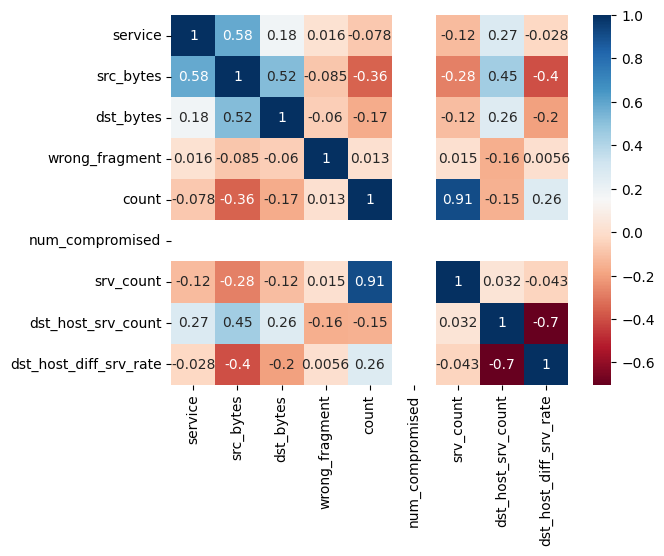

In [15]:
#I selected certain features but I will have to find some covariance between them so I will plot a covariance heatmap
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
y = udp_df.loc[:,target]
y

0         0
1         0
2         0
3         1
4         1
         ..
311024    0
311025    0
311026    0
311027    0
311028    0
Name: result, Length: 26703, dtype: int64

In [14]:
X

,service,src_bytes,dst_bytes,wrong_fragment,count,num_compromised,srv_count,dst_host_srv_count,dst_host_diff_srv_rate
0,0.0,105,146,0,1,0,1,254,0.01
1,0.0,105,146,0,1,0,1,254,0.01
2,0.0,105,146,0,1,0,1,254,0.01
3,0.0,105,146,0,2,0,2,254,0.01
4,0.0,105,146,0,2,0,2,254,0.01
...,...,...,...,...,...,...,...,...,...
311024,0.0,105,147,0,2,0,2,255,0.00
311025,0.0,105,147,0,4,0,4,255,0.00
311026,0.0,105,147,0,2,0,2,255,0.00
311027,0.0,105,147,0,4,0,4,255,0.00


In [18]:
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

dst_bytes                 0.313644
src_bytes                 0.194134
service                   0.139014
srv_count                 0.126772
dst_host_srv_count        0.105586
count                     0.100793
dst_host_diff_srv_rate    0.019595
wrong_fragment            0.000462
num_compromised           0.000000
dtype: float64


In [19]:
#updated feature selection to release overfitting and accuracy improvement
#in generalised prediction
X = X.loc[:,["dst_bytes","service","src_bytes","dst_host_srv_count","count"]]
X.head(20)

,dst_bytes,service,src_bytes,dst_host_srv_count,count
0,146,0.0,105,254,1
1,146,0.0,105,254,1
2,146,0.0,105,254,1
3,146,0.0,105,254,2
4,146,0.0,105,254,2
5,146,0.0,105,255,2
6,0,-0.3,29,3,2
7,146,0.0,105,253,1
8,146,0.0,105,254,2
10,146,0.0,105,254,2


In [20]:
print(list(X.loc[32,:])) #5 attributes

[146.0, 0.0, 105.0, 254.0, 2.0]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","DecisionTree"]
scores = []

In [24]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of the model is:  71.13968293596305
Confusion Matrix:
 [[2787 2070]
 [ 242 2912]]
Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.71      4857
           1       0.58      0.92      0.72      3154

    accuracy                           0.71      8011
   macro avg       0.75      0.75      0.71      8011
weighted avg       0.79      0.71      0.71      8011


==============***===============


Accuracy of the model is:  73.93583822244413
Confusion Matrix:
 [[3560 1297]
 [ 791 2363]]
Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      4857
           1       0.65      0.75      0.69      3154

    accuracy                           0.74      8011
   macro avg       0.73      0.74      0.73      8011
weighted avg       0.75      0.74      0.74      8011


==============***===============
Accuracy of the model is:  72.35051803769817
Confusion Matrix:
 [[2678 2179]
 [  36 3118]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.55      0.71      4857
           1       0.59      0.99      0.74      3154

    accuracy                           0.72      8011
   macro avg       0.79      0.77      0.72      8011
weighted avg       0.83      0.72      0.72      8011


==============***===============
Accuracy of the model is:  77.18137560853826
Confusion Matrix:
 [[3831 1026]
 

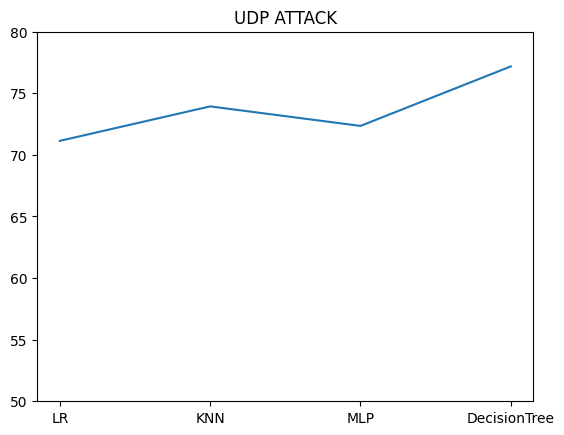

In [25]:
plt.plot(classifiers,scores)
plt.title("UDP ATTACK")
plt.ylim(50,80)
plt.show()

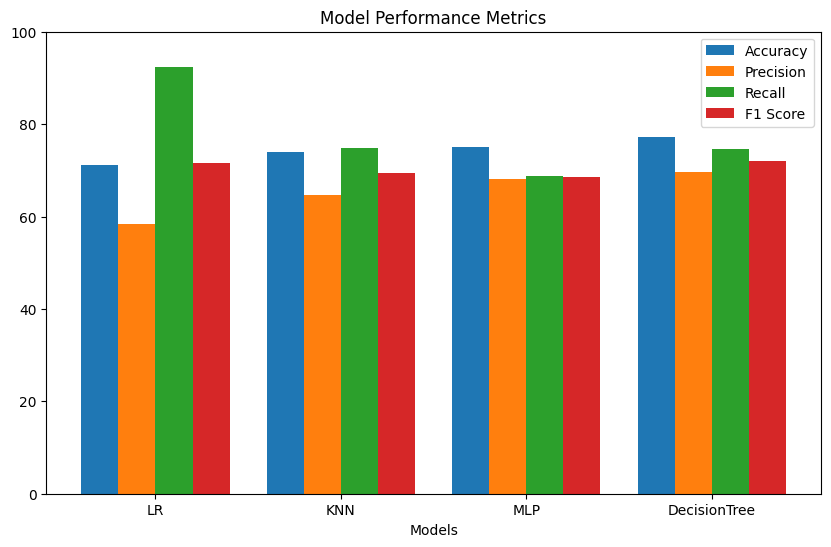

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3), MLPClassifier(alpha=0.015), DecisionTreeClassifier()]


# Calculate accuracy, precision, recall, and F1 score for each model
accuracies = []
precisions = []
recalls = []
f1_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracies.append(accuracy * 100)
    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)

# Bar graph
models = ["LR", "KNN", "MLP", "DecisionTree"]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - 1.5 * width, accuracies, width, label='Accuracy', align='center')
bar2 = ax.bar(x - 0.5 * width, precisions, width, label='Precision', align='center')
bar3 = ax.bar(x + 0.5 * width, recalls, width, label='Recall', align='center')
bar4 = ax.bar(x + 1.5 * width, f1_scores, width, label='F1 Score', align='center')

ax.set_xlabel('Models')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 100)

plt.show()


In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define individual models
model1 = RandomForestClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()
model4 = SVC()

# Create a Voting Classifier as an ensemble
ensemble = VotingClassifier(estimators=[
    ('rf', model1),
    ('knn', model2),
    ('lr', model3),
    ('svm', model4)
], voting='hard')  # 'hard' for majority vote

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the ensemble model's performance
accuracy = accuracy_score(y_test, y_pred_ensemble)
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
report = classification_report(y_test, y_pred_ensemble)

print("Ensemble Model - Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Ensemble Model - Accuracy: 76.07%
Confusion Matrix:
 [[3556 1301]
 [ 616 2538]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79      4857
           1       0.66      0.80      0.73      3154

    accuracy                           0.76      8011
   macro avg       0.76      0.77      0.76      8011
weighted avg       0.78      0.76      0.76      8011

